<a href="https://colab.research.google.com/github/DBCooper200/project_dl/blob/main/multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!ls -lha /root/.kaggle/kaggle.json

-rw------- 1 root root 67 May 24 15:54 /root/.kaggle/kaggle.json


In [3]:
!pip install -q kaggle

In [4]:
!kaggle datasets download -d himanshuagarwal1998/glaucomadataset

100% 2.54G/2.54G [00:31<00:00, 147MB/s]
100% 2.54G/2.54G [00:31<00:00, 87.4MB/s]


In [5]:
!mkdir -p /content/Data_set
!unzip -q /content/glaucomadataset.zip -d /content/Data_set

In [6]:
import tensorflow 
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import os
import cv2
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [7]:
path = ['/content/Data_set/Non Glaucoma', '/content/Data_set/Glaucoma']
images = []
labels = []
for n,i in enumerate(path):
    for j in tqdm(os.listdir(i)):
        img_path = os.path.join(i,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        images.append(img)
        labels.append(n)
images = np.array(images)/255
labels = np.array(labels)

100%|██████████| 511/511 [00:13<00:00, 37.08it/s]


In [8]:
for n in enumerate(path):
  print(n)

#the labels assigned are 
# 0 for non glaucomic images
# 1 for glaucomic images

(0, '/content/Data_set/Non Glaucoma')
(1, '/content/Data_set/Glaucoma')


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, labels = shuffle(images, labels, random_state=32)
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.15, random_state=44)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=40)
     

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True, vertical_flip=True,
                            fill_mode='constant', cval=0.)
train_gen = datagen.flow(x_train, y_train, batch_size=32)
#Using TensorFlow backend.

#for test set
test_gen = datagen.flow(x_test, y_test, batch_size = 32)

In [11]:
initializer = tensorflow.keras.initializers.HeNormal()

In [18]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, input_shape=(64,64), activation='relu',kernel_initializer=initializer))
model.add(Dense(128, activation='relu',kernel_initializer=initializer))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
tb_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
#the above is done to get tensorboard logs which are then referred by callback parameter below
model.fit_generator(train_gen, epochs=100, steps_per_epoch=1,verbose=1, validation_data=(x_valid,y_valid),callbacks=[tb_callback])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9198 - accuracy: 0.3750 - val_loss: 2.7589 - val_accuracy: 0.4610
Epoch 2/100
1/1 [==============================] - 1s 988ms/step - loss: 2.9197 - accuracy: 0.5000 - val_loss: 0.5454 - val_accuracy: 0.6753
Epoch 3/100
1/1 [==============================] - 1s 919ms/step - loss: 0.5406 - accuracy: 0.6250 - val_loss: 0.6900 - val_accuracy: 0.5584
Epoch 4/100
1/1 [==============================] - 1s 935ms/step - loss: 0.9092 - accuracy: 0.4375 - val_loss: 0.4769 - val_accuracy: 0.9351
Epoch 5/100
1/1 [==============================] - 1s 901ms/step - loss: 0.3790 - accuracy: 0.8125 - val_loss: 0.5730 - val_accuracy: 0.9286
Epoch 6/100
1/1 [==============================] - 1s 942ms/step - loss: 0.2920 - accuracy: 0.8125 - val_loss: 0.5367 - val_accuracy: 0.9286
Epoch 7/100
1/1 [==============================] - 1s 917ms/step - loss: 0.7797 - accuracy: 0.8438 - val_loss: 0.4168 - val_accuracy: 0.9026
Epoch 8/100
1/1 

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               3145984   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,179,009
Trainable params: 3,179,009
Non-trainable params: 0
_________________________________________________________________


In [21]:
!tensorboard dev upload --logdir logs 

2023-05-24 16:09:43.909650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   JBG-VDZ-ZWH


Upload started and will continue reading any new data as it's added to the logdir.

To sto

In [22]:
pred = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 8ms/step - loss: 0.2908 - accuracy: 0.8931


Text(0, 0.5, 'value indicating true or false(green->actual value, red->predicted value by model)')

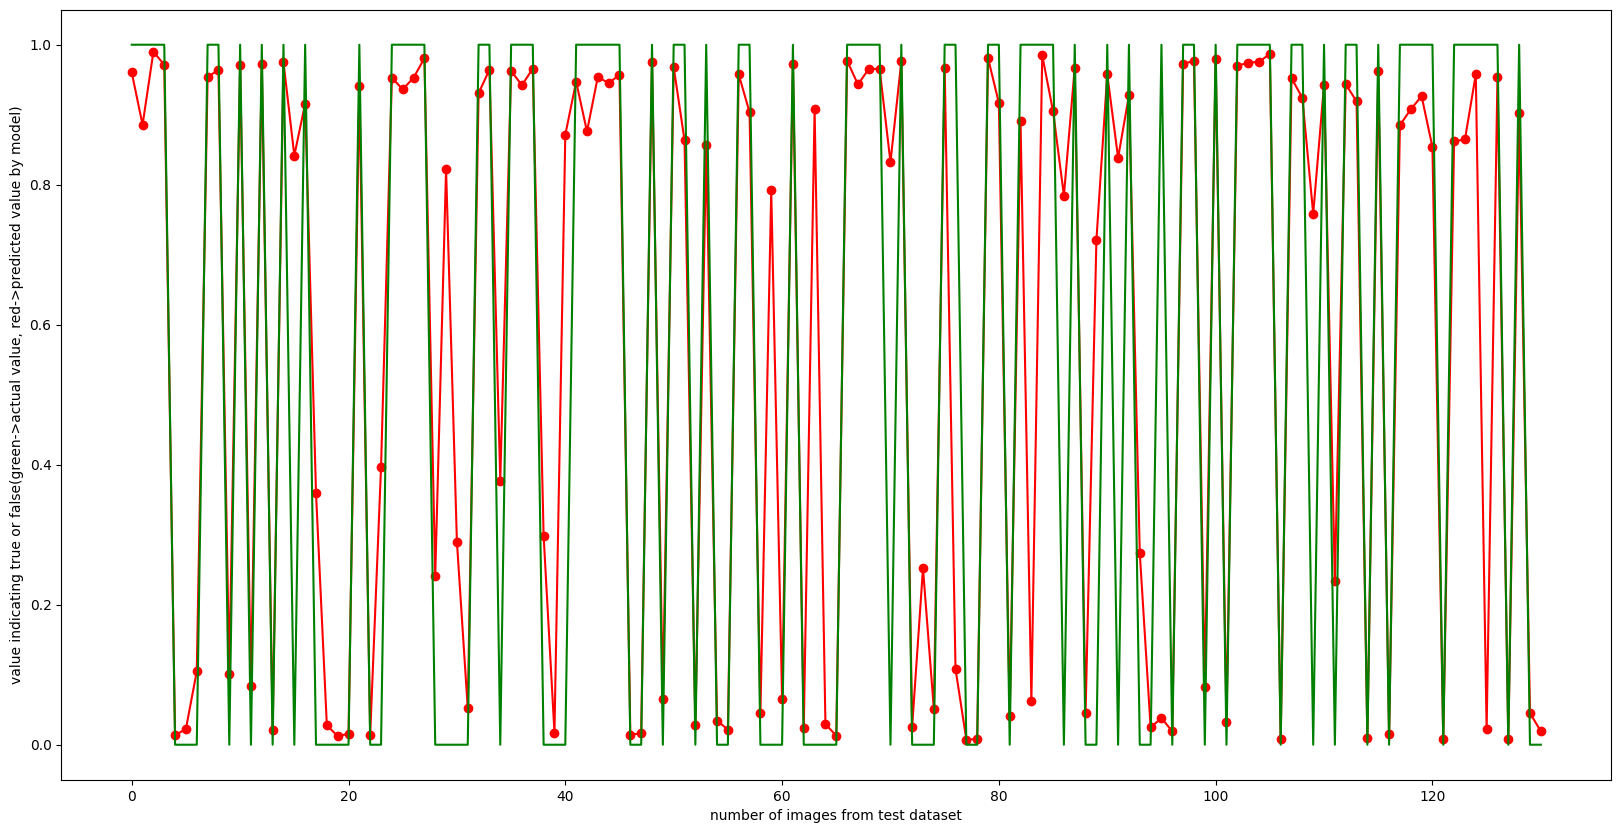

In [23]:
y_test_predicted=[]
for i in range(len(x_test)):
  res_test_imag = image.img_to_array(x_test[i])
  res_test_imag = np.expand_dims(res_test_imag, axis = 0)
  y_test_predicted.append(model.predict(res_test_imag,verbose=None))
y_test_predicted=np.array(y_test_predicted)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20.0,10.0))
x_axis = len(x_test)
y_test_predicted_flattened=y_test_predicted.ravel()
y_test_flattened=y_test.ravel()
plt.plot(y_test_predicted_flattened,marker='o',color='red')
plt.plot(y_test_flattened,color='green');
plt.xlabel('number of images from test dataset')
plt.ylabel("value indicating true or false(green->actual value, red->predicted value by model)")
#green->actual value
#red->predicted value by model
